# BANKRUPTCY PREVENTION 

### Importing Necessary Libraries

In [1]:
"""
This script has the following libraries imported: pandas, numpy, matplotlib, seaborn, wordcloud, scikit-learn.

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, classification_report, roc_auc_score, roc_curve

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the excel file present in the device
read_file = pd.read_excel ("bankruptcy-prevention (2).xlsx") 

In [3]:
read_file

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class,Unnamed: 1
0,0.5;1;0;0;0;0.5;bankruptcy,NaN
1,0;1;0;0;0;1;bankruptcy,NaN
2,1;0;0;0;0;1;bankruptcy,NaN
3,0.5;0;0;0.5;0;1;bankruptcy,NaN
4,1;1;0;0;0;1;bankruptcy,NaN
...,...,...
245,0;1;1;1;1;1;non-bankruptcy,NaN
246,1;1;0.5;1;1;0;non-bankruptcy,NaN
247,0;1;1;0.5;0.5;0;non-bankruptcy,NaN
248,1;0;0.5;1;0.5;0;non-bankruptcy,NaN


In [4]:
"""
This script is used for Converting the .xlsx to .Csv file and reading it using pandas library.
"""

read_file.to_csv ("bankruptcy-prevention.csv")  
df = pd.read_csv("bankruptcy-prevention.csv", sep="[;,]")

In [5]:
df

,Unnamed: 0,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,Unnamed: 1
0,0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,NaN
1,1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,NaN
2,2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,NaN
3,3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,NaN
4,4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,NaN
...,...,...,...,...,...,...,...,...,...
245,245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,NaN
246,246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,NaN
247,247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,NaN
248,248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,NaN


# Exploratory Data Analysis (EDA)

In [6]:
#dropping the Unnamed coloums(extra)
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 1', axis=1)

In [7]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [8]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [9]:
df.columns = ['Industrial_risk', 'Management_risk', 'Financial_flexibility',
       'Credibility', 'Competitiveness', 'Operating_risk',
       'Class']

In [10]:
df

,Industrial_risk,Management_risk,Financial_flexibility,Credibility,Competitiveness,Operating_risk,Class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Industrial_risk        250 non-null    float64
 1   Management_risk        250 non-null    float64
 2   Financial_flexibility  250 non-null    float64
 3   Credibility            250 non-null    float64
 4   Competitiveness        250 non-null    float64
 5   Operating_risk         250 non-null    float64
 6   Class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [12]:
df.describe()

,Industrial_risk,Management_risk,Financial_flexibility,Credibility,Competitiveness,Operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.isnull().sum()

Industrial_risk          0
Management_risk          0
Financial_flexibility    0
Credibility              0
Competitiveness          0
Operating_risk           0
Class                    0
dtype: int64

## Correlation Heatmap

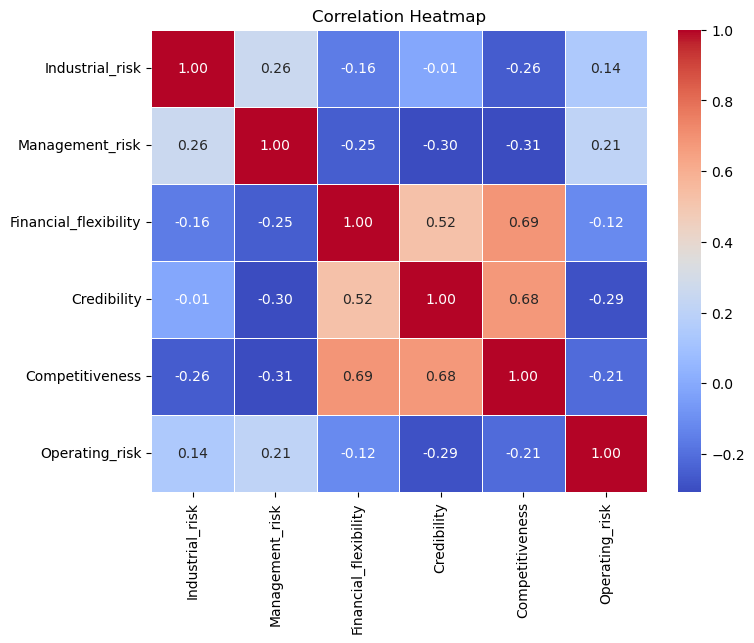

In [14]:
#Co-rrelation heatmap to indentify the realtion between coloums
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
df['Class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: Class, dtype: int64

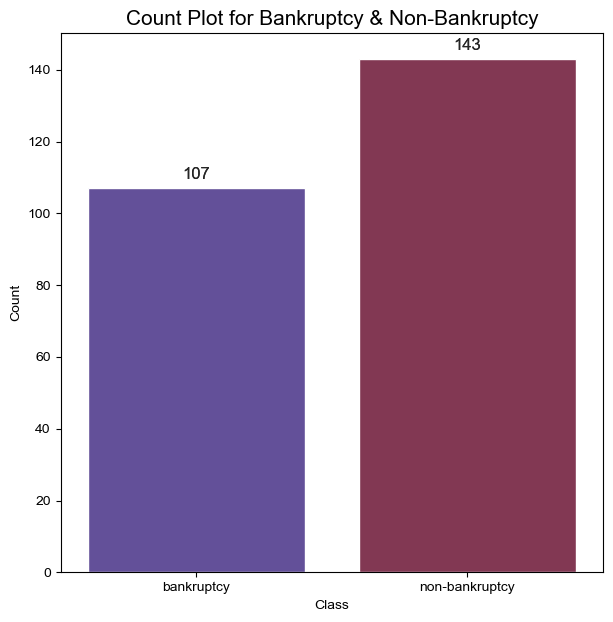

In [16]:
# CountPlot of value count of 'CLASS' Column
plt.figure(figsize=(7, 7))
sns.countplot(x='Class', data=df)
sns.set(style="whitegrid")

ax = sns.countplot(data=df, x='Class',palette='twilight')
# Adding circle annotations for each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count Plot for Bankruptcy & Non-Bankruptcy', fontsize=15)
plt.xlabel('Class', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

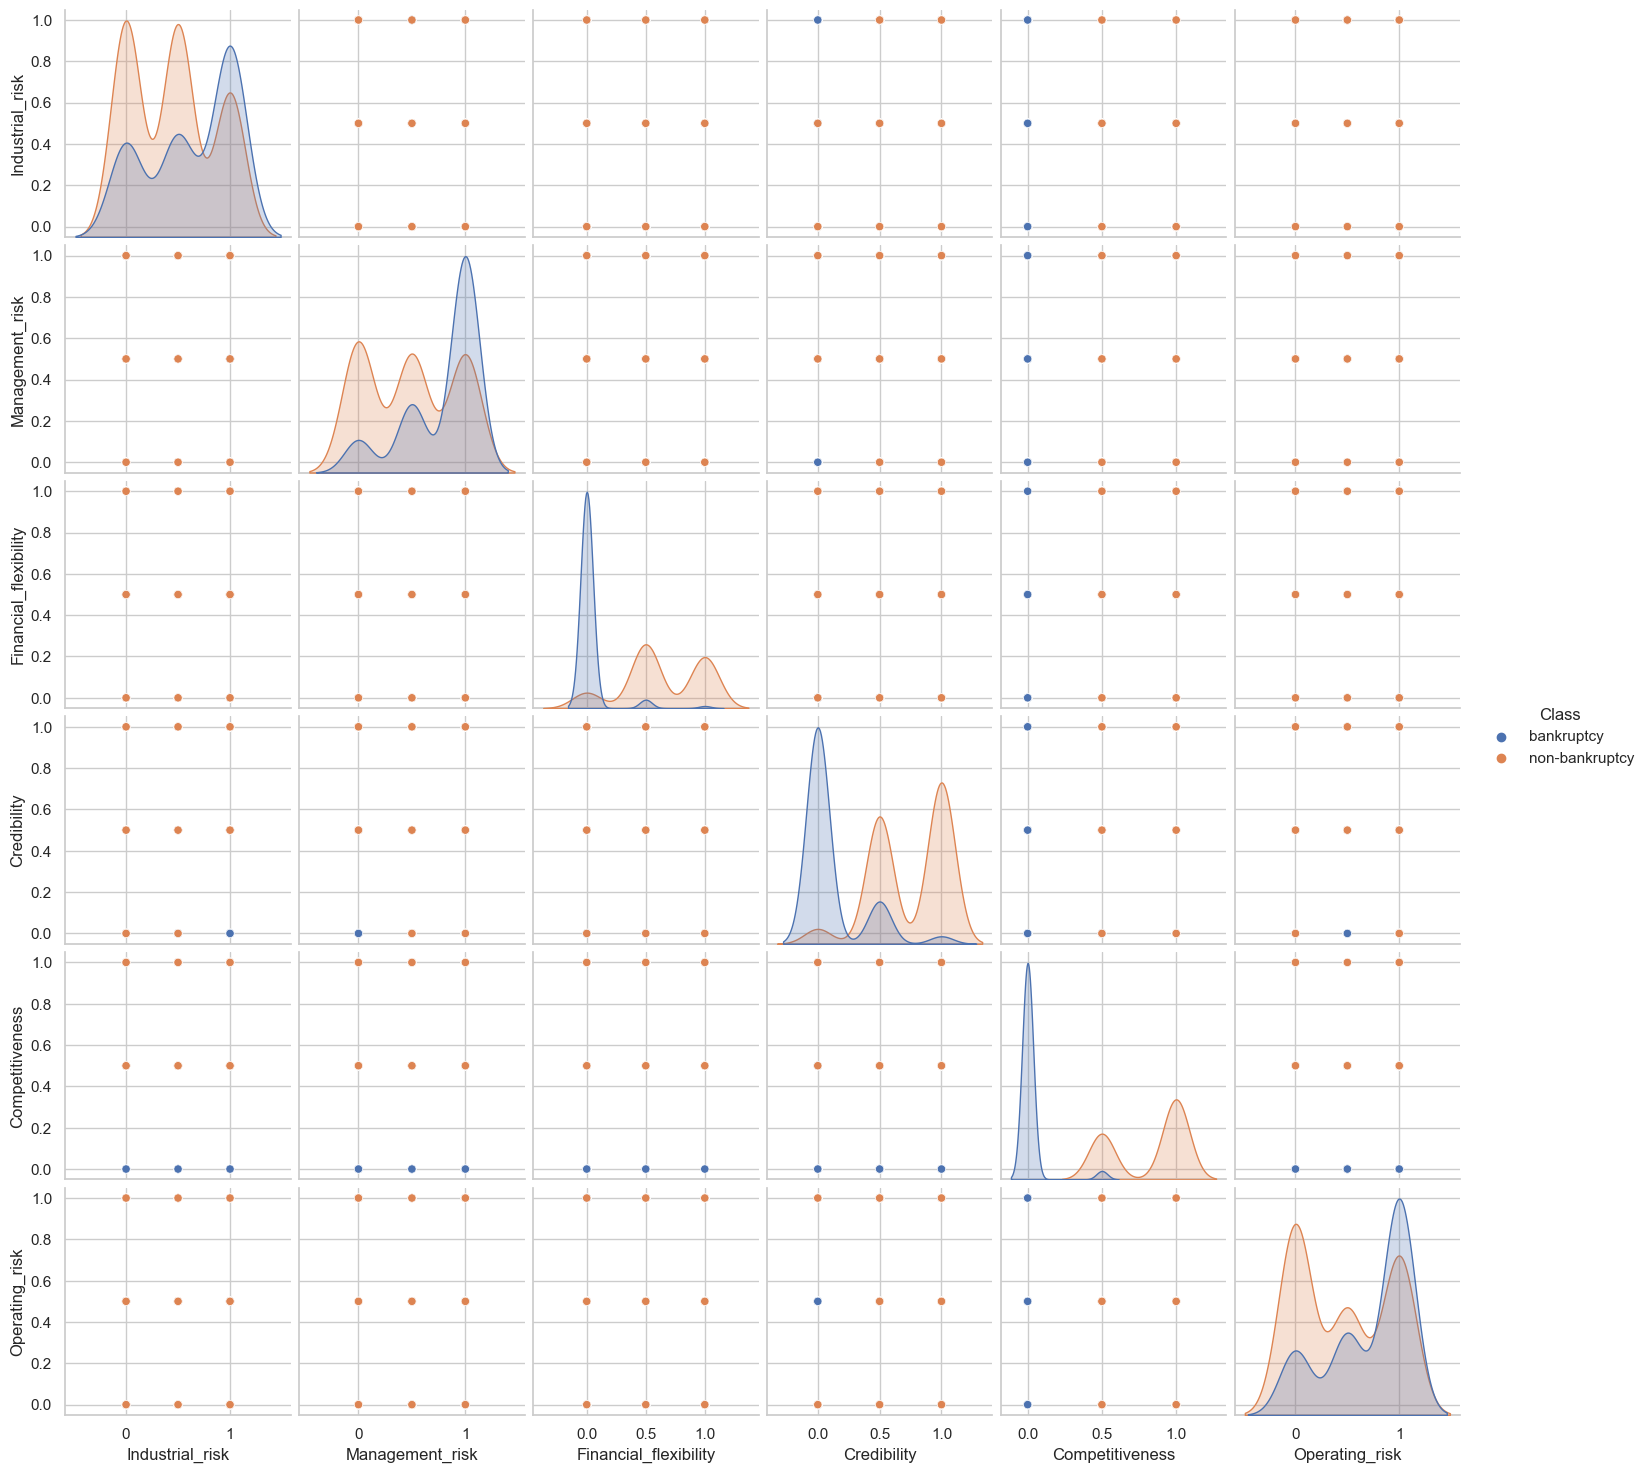

In [17]:
#Pairplot to understand relationships between variables within a dataset
sns.pairplot(df, hue = 'Class')

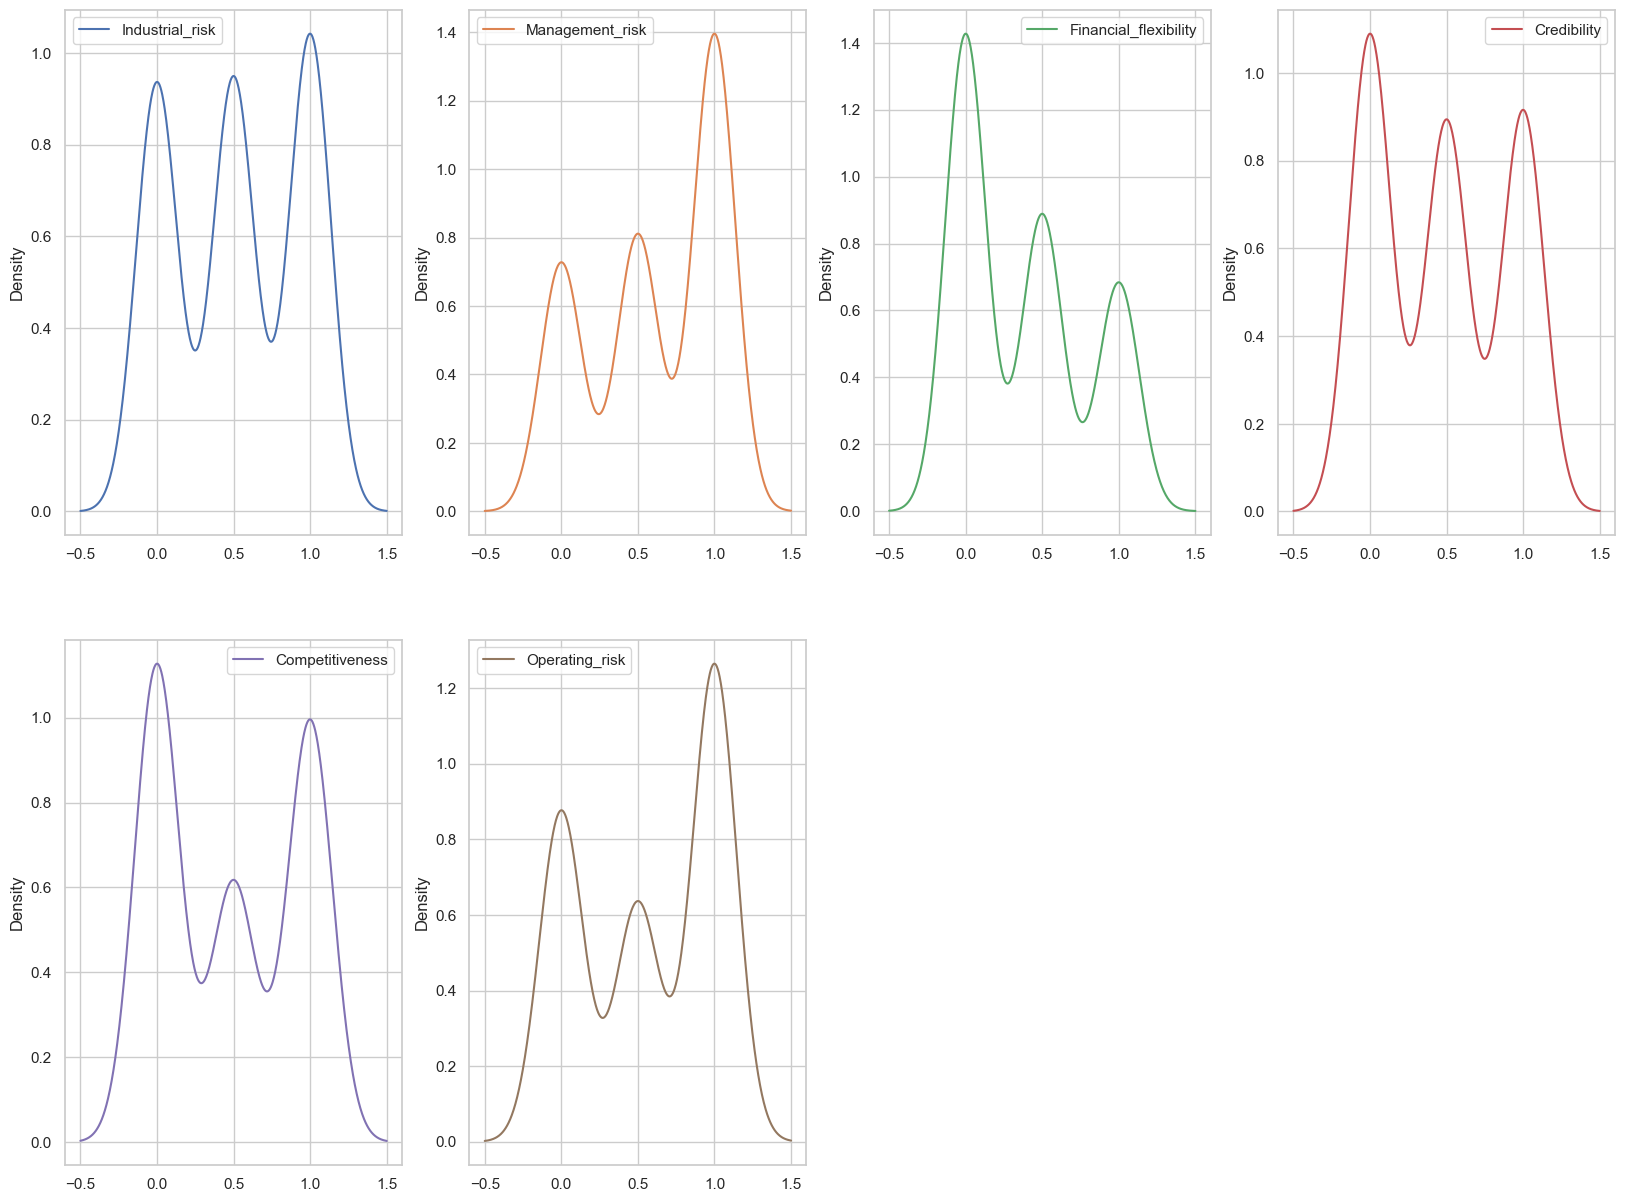

In [18]:
#Densityplot to observe the distribution of a variable in a dataset
df.plot(kind='density', subplots=True, layout=(2,4), sharex=False, figsize=(20,15))
plt.show()

### Checking count of each category in the independent variables

In [19]:
"""
In this script we have counted the independent values of each coloum.
We have plotted the same output as below using countplot.
"""
print("\n")
print(df['Industrial_risk'].value_counts())
print("\n")
print(df['Management_risk'].value_counts())
print("\n")
print(df['Financial_flexibility'].value_counts())
print("\n ")
print(df['Credibility'].value_counts())
print(" ")
print(df['Competitiveness'].value_counts())
print("\n ")
print(df['Operating_risk'].value_counts())



1.0    89
0.5    81
0.0    80
Name: Industrial_risk, dtype: int64


1.0    119
0.5     69
0.0     62
Name: Management_risk, dtype: int64


0.0    119
0.5     74
1.0     57
Name: Financial_flexibility, dtype: int64

 
0.0    94
1.0    79
0.5    77
Name: Credibility, dtype: int64
 
0.0    103
1.0     91
0.5     56
Name: Competitiveness, dtype: int64

 
1.0    114
0.0     79
0.5     57
Name: Operating_risk, dtype: int64


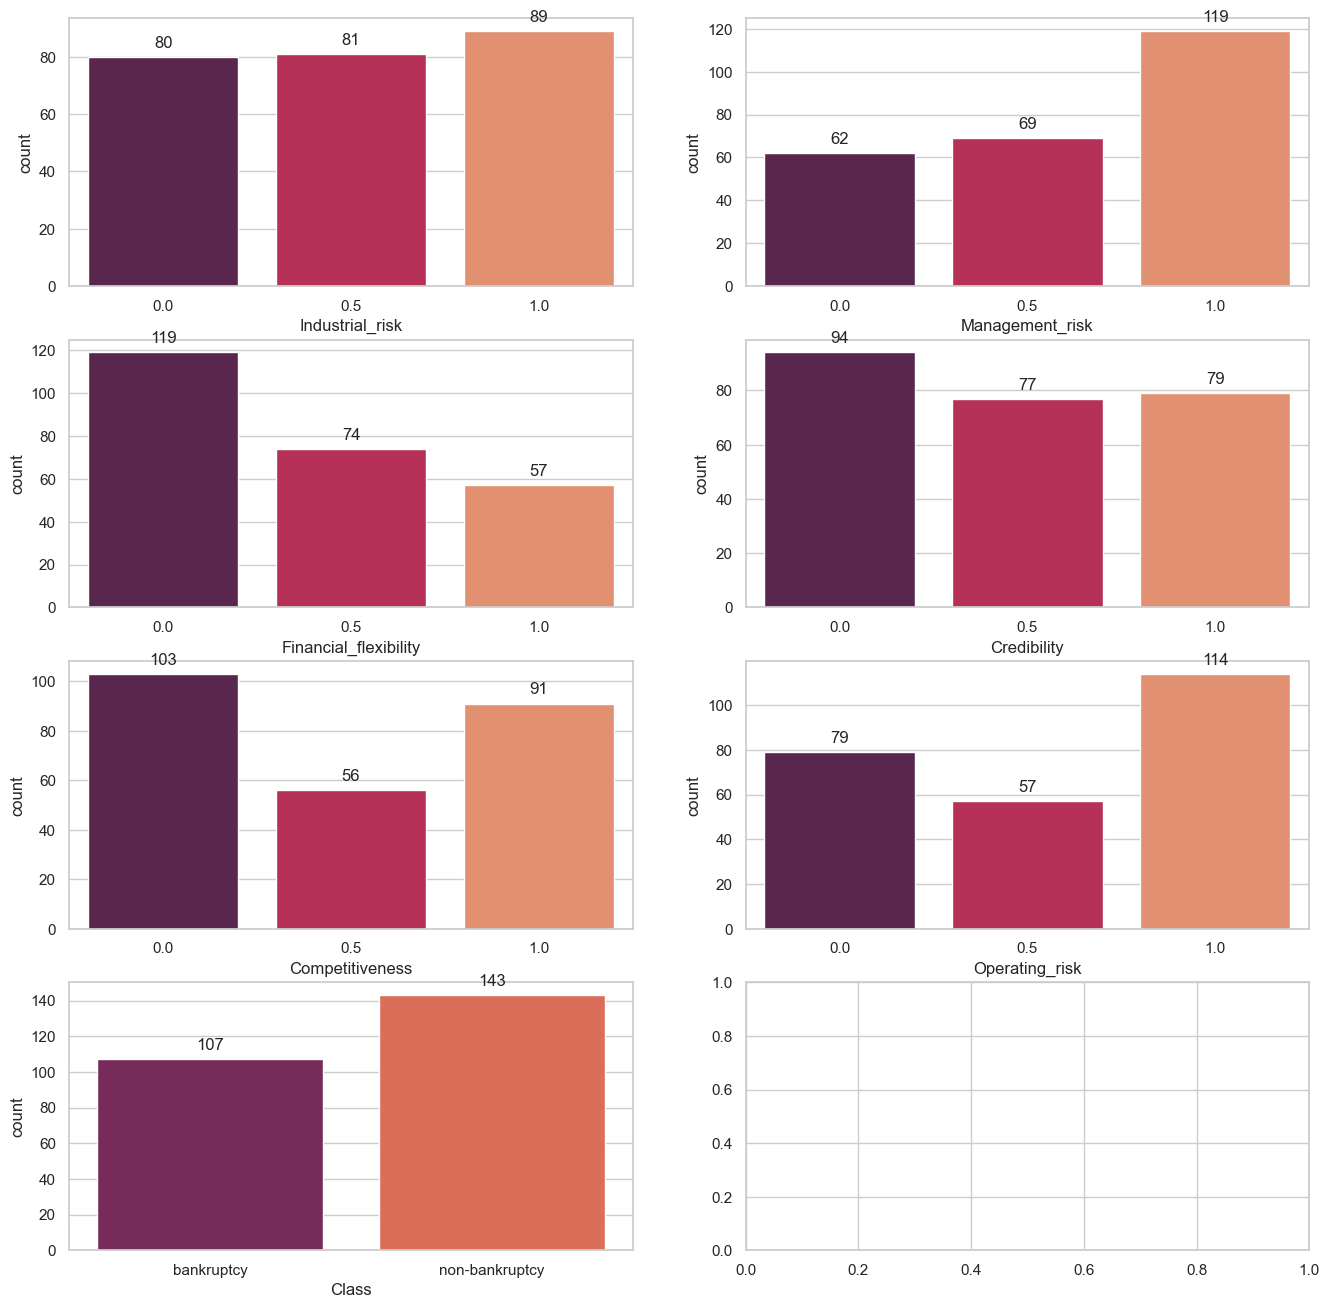

<Figure size 640x480 with 0 Axes>

In [20]:
#Colunt plot to count independent values in each coloum.
num_features = len(df.columns)
num_rows = (num_features // 2) + (num_features % 2)  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 4*num_rows))
axes = axes.flatten()
# Createing count plots for each feature and display them in the subplot grid
for idx, feature in enumerate(df.columns):
    sns.countplot(data=df, x=feature, palette='rocket', ax=axes[idx])
    # Adding circle annotations for each bar
    for p in axes[idx].patches:
        axes[idx].annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center',
                            va='center',
                            xytext=(0, 10),
                            textcoords='offset points')

plt.show()
plt.tight_layout()
plt.show()

In [21]:
"""
In this script we have counted the values of each coloum with class.
We have plotted the same output below.
"""

print("\n")
print(pd.crosstab(df['Industrial_risk'], df['Class']))
print("\n")
print(pd.crosstab(df['Management_risk'], df['Class']))
print("\n")
print(pd.crosstab(df['Financial_flexibility'], df['Class']))
print("\n")
print(pd.crosstab(df['Credibility'], df['Class']))
print("\n")
print(pd.crosstab(df['Competitiveness'], df['Class']))
print("\n")
print(pd.crosstab(df['Operating_risk'], df['Class']))



Class            bankruptcy  non-bankruptcy
Industrial_risk                            
0.0                      26              54
0.5                      28              53
1.0                      53              36


Class            bankruptcy  non-bankruptcy
Management_risk                            
0.0                      11              51
0.5                      23              46
1.0                      73              46


Class                  bankruptcy  non-bankruptcy
Financial_flexibility                            
0.0                           102              17
0.5                             4              70
1.0                             1              56


Class        bankruptcy  non-bankruptcy
Credibility                            
0.0                  87               7
0.5                  17              60
1.0                   3              76


Class            bankruptcy  non-bankruptcy
Competitiveness                            
0.0         

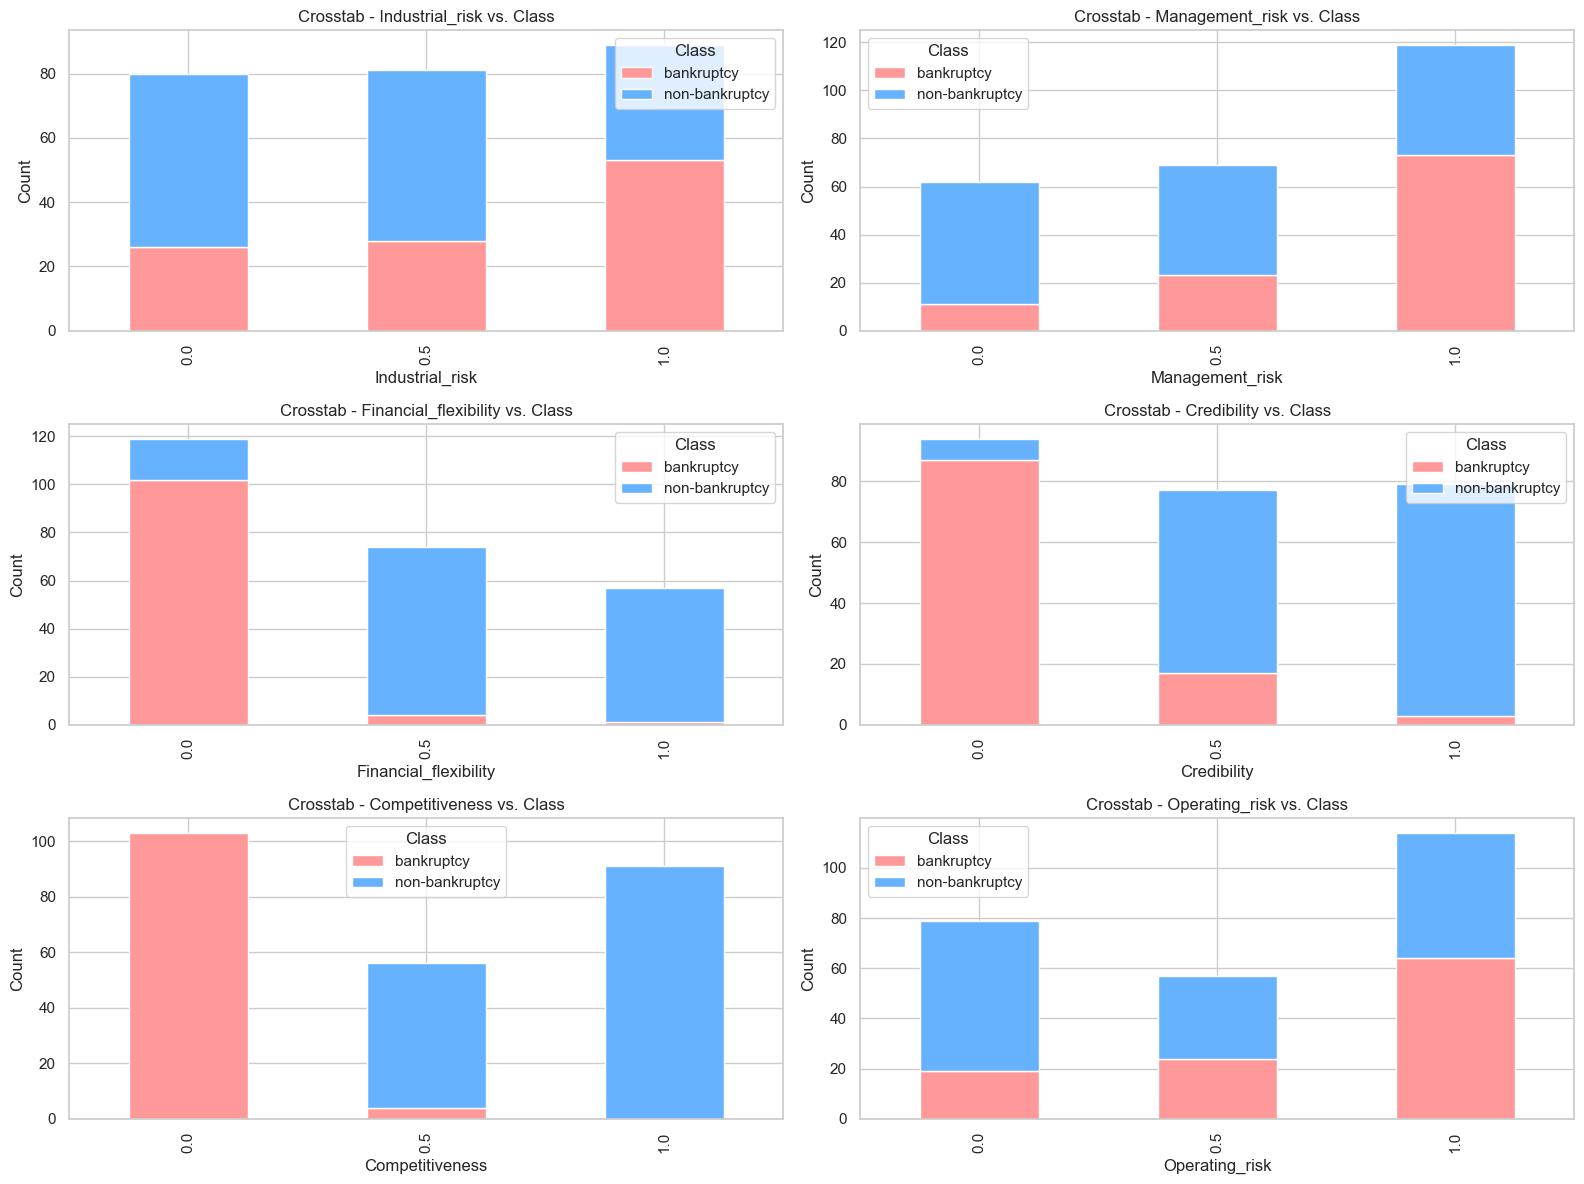

In [22]:
#Counting values of each coloum and displaying it w.r.t Class
independent_variables = ['Industrial_risk', 'Management_risk', 'Financial_flexibility', 'Credibility', 'Competitiveness', 'Operating_risk']

# Createing subplots dynamically based on the number of independent variables
num_features = len(independent_variables)
num_rows = (num_features // 2) + (num_features % 2)
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 4*num_rows))
axes = axes.flatten()
for idx, variable in enumerate(independent_variables):
    pd.crosstab(df[variable], df['Class']).plot(kind='bar', stacked=True, ax=axes[idx], color=['#FF9999', '#66B2FF'])
    axes[idx].set_title(f'Crosstab - {variable} vs. Class')
    axes[idx].set_xlabel(variable)
    axes[idx].set_ylabel('Count')

# Removing extra subplots if there are more axes than independent variables
for ax in axes[num_features:]:
    ax.remove()

# Adjusting the tight layout for different numbers of rows
plt.tight_layout()
plt.show()

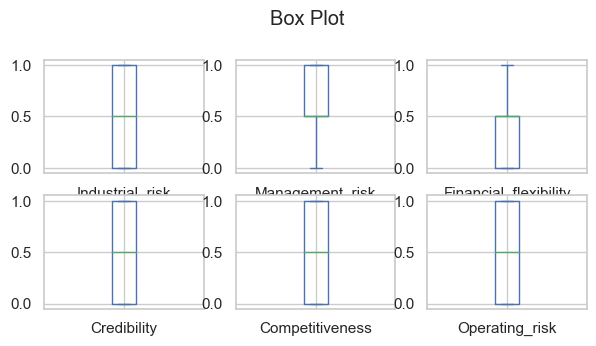

In [23]:
"""
This script we have used box plot to find outliers in the data.
"""

df.plot(kind='box',subplots= True, layout=(3,3),sharex=False, sharey=False,figsize=(7,5), title='Box Plot')
plt.show()

<AxesSubplot:>

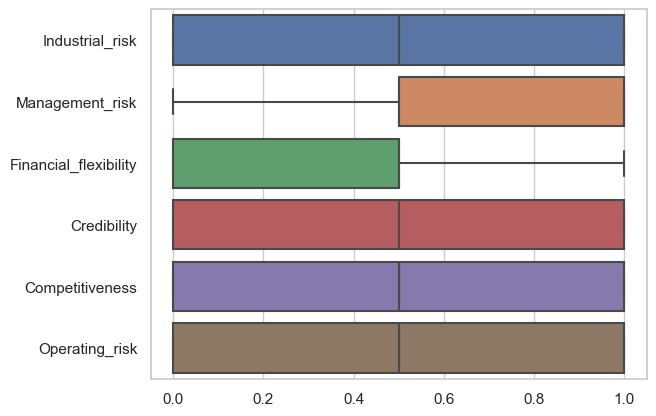

In [24]:
sns.boxplot(data=df, orient='h')

* There are no outliers in the given dataset.
  

In [25]:
# #Boxplot for each featue by class
# custom_palette = sns.color_palette("Set2")

# # Createing a figure and axes dynamically based on the number of features
# num_features = len(df.columns)
# num_rows = (num_features // 2) + (num_features % 2)
# fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 4*num_rows))
# axes = axes.flatten()

# # Creating boxplots for each feature grouped by the 'Class' column with custom colors
# for idx, feature in enumerate(df.columns):
#     if idx >= len(axes):  # Check if the index exceeds the number of available axes
#         break
#     sns.boxplot(x='Class', y=feature, data=df, palette=custom_palette, ax=axes[idx], width=0.5, order=['bankruptcy', 'non-bankruptcy'])
#     # Set plot title and labels
#     axes[idx].set_title(f'Boxplot of {feature} by Class', fontsize=16)
#     axes[idx].set_xlabel('Class', fontsize=12)
#     axes[idx].set_ylabel(feature, fontsize=12)

# for ax in axes[num_features:]:
#     ax.remove()

# plt.suptitle('Boxplots of Features by Class', fontsize=20)
# plt.tight_layout()
# plt.show()

# MODEL BUILDING

## Label Encodeing

In [26]:
"""
The label encoding is done for class coloum which identifies each element and labels them.
Bankruptcy - 0
Non- Bankruptcy - 1
"""
LE = LabelEncoder()
df['Class'] = LE.fit_transform(df['Class'])

In [27]:
df

,Industrial_risk,Management_risk,Financial_flexibility,Credibility,Competitiveness,Operating_risk,Class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [28]:
X = df.iloc[:,0:6] 
X


,Industrial_risk,Management_risk,Financial_flexibility,Credibility,Competitiveness,Operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [29]:
Y = df['Class']
Y

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: Class, Length: 250, dtype: int32

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# 1. Logistic regression

In [31]:
# Logestic Regression Model
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [32]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

log_train_acc = accuracy_score(y_train, y_pred_train)
log_test_acc = accuracy_score(y_test, y_pred_test)

log_train_f1 = f1_score(y_train, y_pred_train)
log_test_f1 = f1_score(y_test, y_pred_test)

log_train_prec = precision_score(y_train, y_pred_train)
log_test_prec = precision_score(y_test, y_pred_test)

log_train_roc = roc_auc_score(y_train, y_pred_train)
log_test_roc = roc_auc_score(y_test, y_pred_test)

log_train_cm = confusion_matrix(y_train, y_pred_train)
log_test_cm = confusion_matrix(y_test, y_pred_test)

In [33]:
#Printing all the meeasuring metric results
print('Logistic Regression training accuracy is', log_train_acc)
print('Logistic Regression testing accuracy is', log_test_acc)
print('--------------------------------------------------------')
print('Logistic Regression training F1 Score is', log_train_f1)
print('Logistic Regression testing F1 Score is', log_test_f1)
print('--------------------------------------------------------')
print('Logistic Regression training Precision is', log_train_prec)
print('Logistic Regression testing Precision is', log_test_prec)
print('--------------------------------------------------------')
print('Logistic Regression training ROC-AUC Score is', log_train_roc)
print('Logistic Regression testing ROC-AUC Score is', log_test_roc)
print('--------------------------------------------------------')
print('Logistic Regression training Confusion Matrix is')
print(log_train_cm)
print('--------------------------------------------------------')
print('Logistic Regression testing Confusion Matrix is')
print(log_test_cm)

Logistic Regression training accuracy is 0.9942857142857143
Logistic Regression testing accuracy is 1.0
--------------------------------------------------------
Logistic Regression training F1 Score is 0.9949748743718593
Logistic Regression testing F1 Score is 1.0
--------------------------------------------------------
Logistic Regression training Precision is 0.99
Logistic Regression testing Precision is 1.0
--------------------------------------------------------
Logistic Regression training ROC-AUC Score is 0.9934210526315789
Logistic Regression testing ROC-AUC Score is 1.0
--------------------------------------------------------
Logistic Regression training Confusion Matrix is
[[75  1]
 [ 0 99]]
--------------------------------------------------------
Logistic Regression testing Confusion Matrix is
[[31  0]
 [ 0 44]]


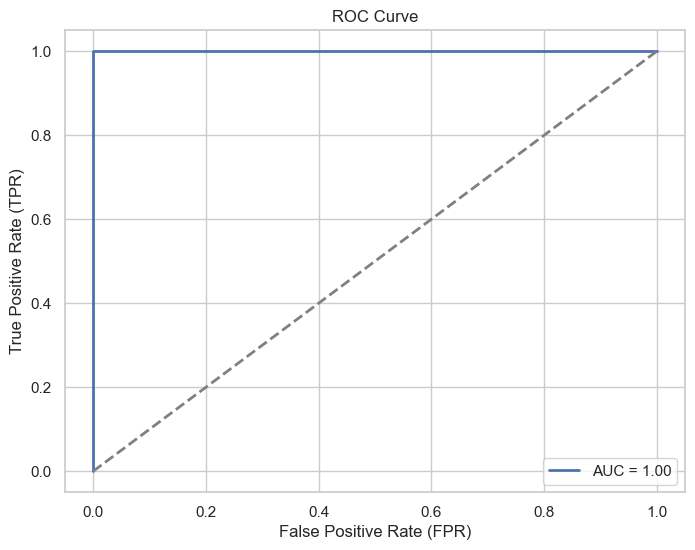

In [34]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {log_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 2. Decision Tree Model
* This model works on the construction of trees that contains different branches at different splits.
  And these branches contains leaves or nodes which are the end points.
* A split occurs at a node based on a certain condition which the model will make based on the data.
* This model is normally used for classification purposes. But it can also be used for regression.

In [35]:
#Decision Tree Model
dec = DecisionTreeClassifier(max_depth=5)
dec.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [36]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = dec.predict(x_train)
y_pred_test = dec.predict(x_test)

dec_train_acc = accuracy_score(y_train, y_pred_train)
dec_test_acc = accuracy_score(y_test, y_pred_test)

dec_train_f1 = f1_score(y_train, y_pred_train)
dec_test_f1 = f1_score(y_test, y_pred_test)

dec_train_prec = precision_score(y_train, y_pred_train)
dec_test_prec = precision_score(y_test, y_pred_test)

dec_train_roc = roc_auc_score(y_train, y_pred_train)
dec_test_roc = roc_auc_score(y_test, y_pred_test)

dec_train_cm = confusion_matrix(y_train, y_pred_train)
dec_test_cm = confusion_matrix(y_test, y_pred_test)

In [37]:
#Printing all the meeasuring metric results
print('Decision tree training accuracy is', dec_train_acc)
print('Decision tree testing accuracy is', dec_test_acc)
print(" ")
print('Decision tree training F1 Score is', dec_train_f1)
print('Decision tree testing F1 Score is', dec_test_f1)
print(" ")
print('Decision tree training Precision is', dec_train_prec)
print('Decision tree testing Precision is', dec_test_prec)
print(" ")
print('Decision tree training ROC-AUC Score is', dec_train_roc)
print('Decision tree testing ROC-AUC Score is', dec_test_roc)
print(" ")
print('Decision tree training Confusion Matrix is')
print(dec_train_cm)
print(" ")
print('Decision tree testing Confusion Matrix is')
print(dec_test_cm)

Decision tree training accuracy is 1.0
Decision tree testing accuracy is 1.0
 
Decision tree training F1 Score is 1.0
Decision tree testing F1 Score is 1.0
 
Decision tree training Precision is 1.0
Decision tree testing Precision is 1.0
 
Decision tree training ROC-AUC Score is 1.0
Decision tree testing ROC-AUC Score is 1.0
 
Decision tree training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
Decision tree testing Confusion Matrix is
[[31  0]
 [ 0 44]]


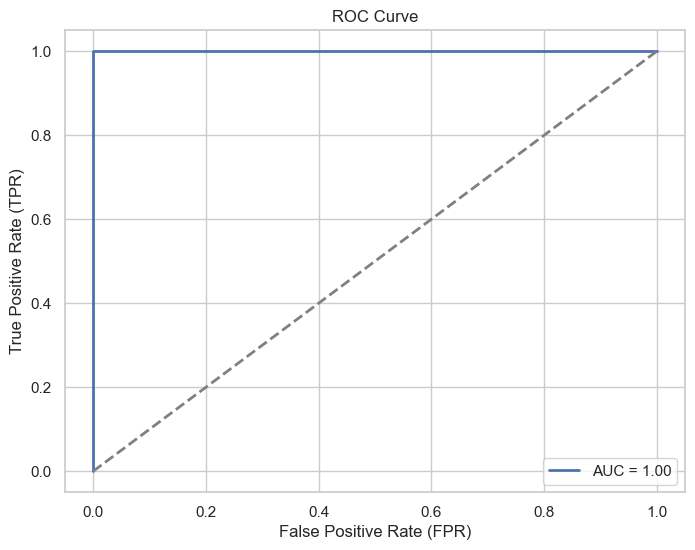

In [38]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {dec_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 3. KNN Classifier

In [39]:
#KNN Classifier Model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

knn_train_acc = accuracy_score(y_train, y_pred_train)
knn_test_acc = accuracy_score(y_test, y_pred_test)

knn_train_f1 = f1_score(y_train, y_pred_train)
knn_test_f1 = f1_score(y_test, y_pred_test)

knn_train_prec = precision_score(y_train, y_pred_train)
knn_test_prec = precision_score(y_test, y_pred_test)

knn_train_roc = roc_auc_score(y_train, y_pred_train)
knn_test_roc = roc_auc_score(y_test, y_pred_test)

knn_train_cm = confusion_matrix(y_train, y_pred_train)
knn_test_cm = confusion_matrix(y_test, y_pred_test)

In [41]:
#Printing all the meeasuring metric results
print('KNN training accuracy is', knn_train_acc)
print('KNN testing accuracy is', knn_test_acc)
print(" ")
print('KNN training F1 Score is', knn_train_f1)
print('KNN testing F1 Score is', knn_test_f1)
print(" ")
print('KNN training Precision is', knn_train_prec)
print('KNN testing Precision is', knn_test_prec)
print(" ")
print('KNN training ROC-AUC Score is', knn_train_roc)
print('KNN testing ROC-AUC Score is', knn_test_roc)
print(" ")
print('KNN training Confusion Matrix is')
print(knn_train_cm)
print(" ")
print('KNN testing Confusion Matrix is')
print(knn_test_cm)

KNN training accuracy is 1.0
KNN testing accuracy is 1.0
 
KNN training F1 Score is 1.0
KNN testing F1 Score is 1.0
 
KNN training Precision is 1.0
KNN testing Precision is 1.0
 
KNN training ROC-AUC Score is 1.0
KNN testing ROC-AUC Score is 1.0
 
KNN training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
KNN testing Confusion Matrix is
[[31  0]
 [ 0 44]]


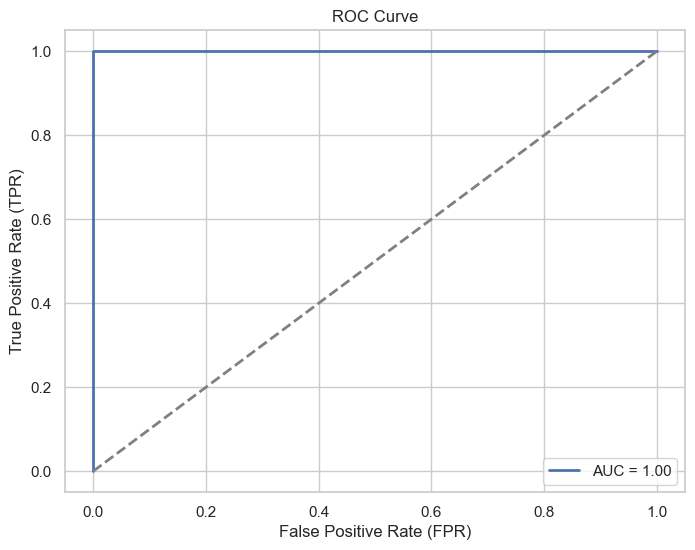

In [42]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {knn_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 4. Random Forest Classifier

In [43]:
#Random Forest Classifier Model
rnd = RandomForestClassifier(max_depth=5)
rnd.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [44]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = rnd.predict(x_train)
y_pred_test = rnd.predict(x_test)

rnd_train_acc = accuracy_score(y_train, y_pred_train)
rnd_test_acc = accuracy_score(y_test, y_pred_test)

rnd_train_f1 = f1_score(y_train, y_pred_train)
rnd_test_f1 = f1_score(y_test, y_pred_test)

rnd_train_prec = precision_score(y_train, y_pred_train)
rnd_test_prec = precision_score(y_test, y_pred_test)

rnd_train_roc = roc_auc_score(y_train, y_pred_train)
rnd_test_roc = roc_auc_score(y_test, y_pred_test)

rnd_train_cm = confusion_matrix(y_train, y_pred_train)
rnd_test_cm = confusion_matrix(y_test, y_pred_test)

In [45]:
#Printing all the meeasuring metric results
print('Random Forest training accuracy is', rnd_train_acc)
print('Random Forest testing accuracy is', rnd_test_acc)
print(" ")
print('Random Forest training F1 Score is', rnd_train_f1)
print('Random Forest testing F1 Score is', rnd_test_f1)
print(" ")
print('Random Forest training Precision is', rnd_train_prec)
print('Random Forest testing Precision is', rnd_test_prec)
print(" ")
print('Random Forest training ROC-AUC Score is', rnd_train_roc)
print('Random Forest testing ROC-AUC Score is', rnd_test_roc)
print(" ")
print('Random Forest training Confusion Matrix is')
print(rnd_train_cm)
print(" ")
print('Random Forest testing Confusion Matrix is')
print(rnd_test_cm)

Random Forest training accuracy is 1.0
Random Forest testing accuracy is 1.0
 
Random Forest training F1 Score is 1.0
Random Forest testing F1 Score is 1.0
 
Random Forest training Precision is 1.0
Random Forest testing Precision is 1.0
 
Random Forest training ROC-AUC Score is 1.0
Random Forest testing ROC-AUC Score is 1.0
 
Random Forest training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
Random Forest testing Confusion Matrix is
[[31  0]
 [ 0 44]]


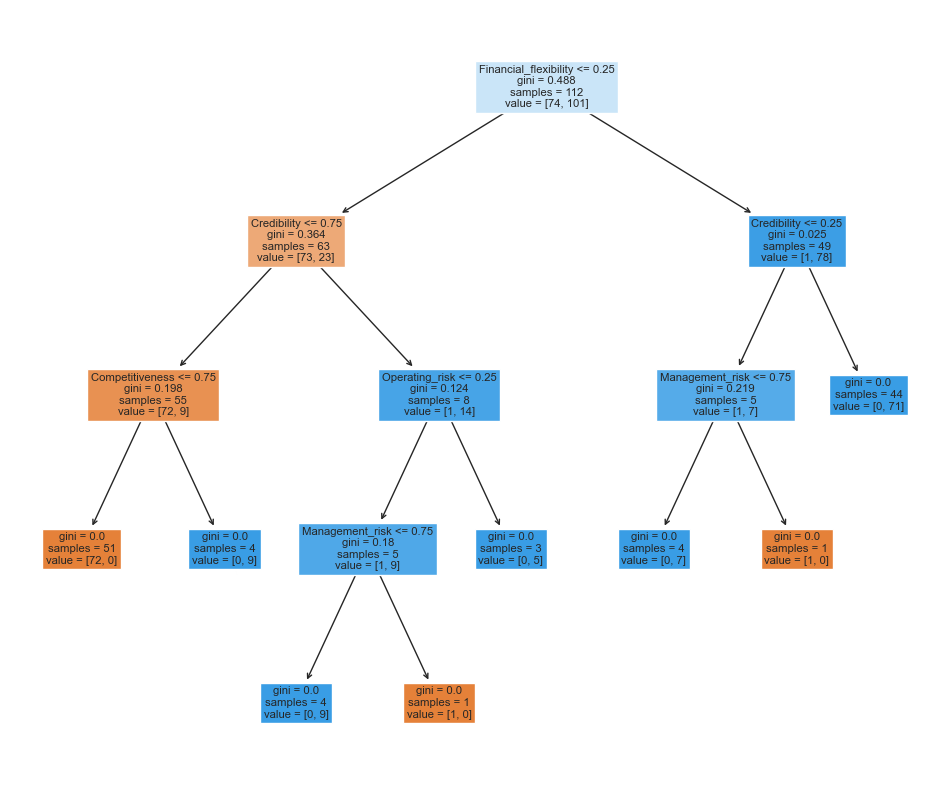

In [46]:
#Ploting decision tree using Random forest model
fig = plt.figure(figsize=(12,10))
_ = tree.plot_tree(rnd.estimators_[9], feature_names= list(X),filled=True, max_depth=5)

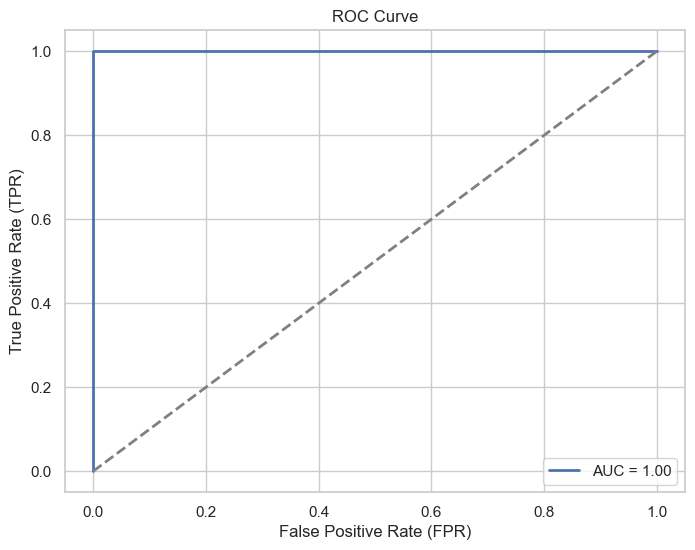

In [47]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {rnd_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 5. Bagging Classifier

In [48]:
#Bagging Classifier
bag = BaggingClassifier(base_estimator=RandomForestClassifier(max_depth = 4), n_estimators=10)
bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4))

In [49]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = bag.predict(x_train)
y_pred_test = bag.predict(x_test)

bag_train_acc = accuracy_score(y_train, y_pred_train)
bag_test_acc = accuracy_score(y_test, y_pred_test)

bag_train_f1 = f1_score(y_train, y_pred_train)
bag_test_f1 = f1_score(y_test, y_pred_test)

bag_train_prec = precision_score(y_train, y_pred_train)
bag_test_prec = precision_score(y_test, y_pred_test)

bag_train_roc = roc_auc_score(y_train, y_pred_train)
bag_test_roc = roc_auc_score(y_test, y_pred_test)

bag_train_cm = confusion_matrix(y_train, y_pred_train)
bag_test_cm = confusion_matrix(y_test, y_pred_test)

In [50]:
#Printing all the meeasuring metric results
print('Bagging training accuracy is', bag_train_acc)
print('Bagging testing accuracy is', bag_test_acc)
print(" ")
print('Bagging training F1 Score is', bag_train_f1)
print('Bagging testing F1 Score is', bag_test_f1)
print(" ")
print('Bagging training Precision is', bag_train_prec)
print('Bagging testing Precision is', bag_test_prec)
print(" ")
print('Bagging training ROC-AUC Score is', bag_train_roc)
print('Bagging testing ROC-AUC Score is', bag_test_roc)
print(" ")
print('Bagging training Confusion Matrix is')
print(bag_train_cm)
print(" ")
print('Bagging testing Confusion Matrix is')
print(bag_test_cm)

Bagging training accuracy is 1.0
Bagging testing accuracy is 1.0
 
Bagging training F1 Score is 1.0
Bagging testing F1 Score is 1.0
 
Bagging training Precision is 1.0
Bagging testing Precision is 1.0
 
Bagging training ROC-AUC Score is 1.0
Bagging testing ROC-AUC Score is 1.0
 
Bagging training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
Bagging testing Confusion Matrix is
[[31  0]
 [ 0 44]]


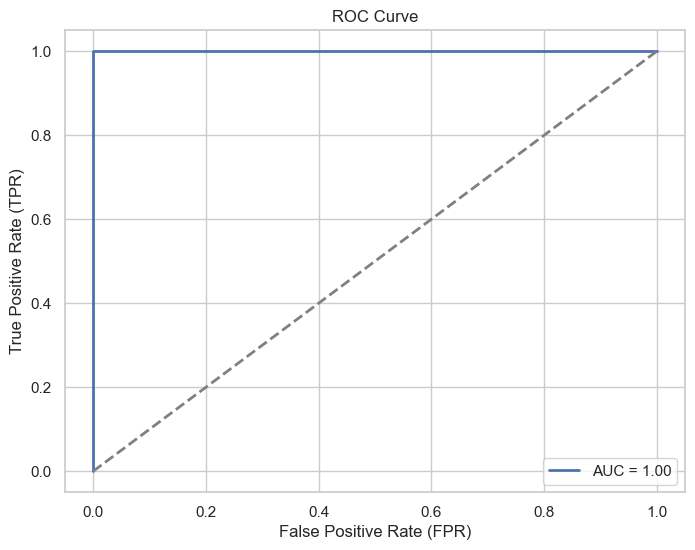

In [51]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {bag_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 6. AdaBoost
* This is another ensemble technique that assigns the weights to the parameters depending the errors.
* Higher weights are assigned to the incorrect predictions and lower weights are assigned to the correct predictions in each iteration.
* This will help it reach the convergence much faster.
* Unlike bagging, AdaBoost focuses on reducing variance, AdaBoost aims to reduce bias and improve the predictive performance of the model.

In [52]:
#Ada Boost 
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5))
ada.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5))

In [53]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)

ada_train_acc = accuracy_score(y_train, y_pred_train)
ada_test_acc = accuracy_score(y_test, y_pred_test)

ada_train_f1 = f1_score(y_train, y_pred_train)
ada_test_f1 = f1_score(y_test, y_pred_test)

ada_train_prec = precision_score(y_train, y_pred_train)
ada_test_prec = precision_score(y_test, y_pred_test)

ada_train_roc = roc_auc_score(y_train, y_pred_train)
ada_test_roc = roc_auc_score(y_test, y_pred_test)

ada_train_cm = confusion_matrix(y_train, y_pred_train)
ada_test_cm = confusion_matrix(y_test, y_pred_test)

In [54]:
#Printing all the meeasuring metric results
print('AdaBoost training accuracy is', ada_train_acc)
print('AdaBoost testing accuracy is', ada_test_acc)
print(" ")
print('AdaBoost training F1 Score is', ada_train_f1)
print('AdaBoost testing F1 Score is', ada_test_f1)
print(" ")
print('AdaBoost training Precision is', ada_train_prec)
print('AdaBoost testing Precision is', ada_test_prec)
print(" ")
print('AdaBoost training ROC-AUC Score is', ada_train_roc)
print('AdaBoost testing ROC-AUC Score is', ada_test_roc)
print(" ")
print('AdaBoost training Confusion Matrix is')
print(ada_train_cm)
print(" ")
print('AdaBoost testing Confusion Matrix is')
print(ada_test_cm)

AdaBoost training accuracy is 1.0
AdaBoost testing accuracy is 1.0
 
AdaBoost training F1 Score is 1.0
AdaBoost testing F1 Score is 1.0
 
AdaBoost training Precision is 1.0
AdaBoost testing Precision is 1.0
 
AdaBoost training ROC-AUC Score is 1.0
AdaBoost testing ROC-AUC Score is 1.0
 
AdaBoost training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
AdaBoost testing Confusion Matrix is
[[31  0]
 [ 0 44]]


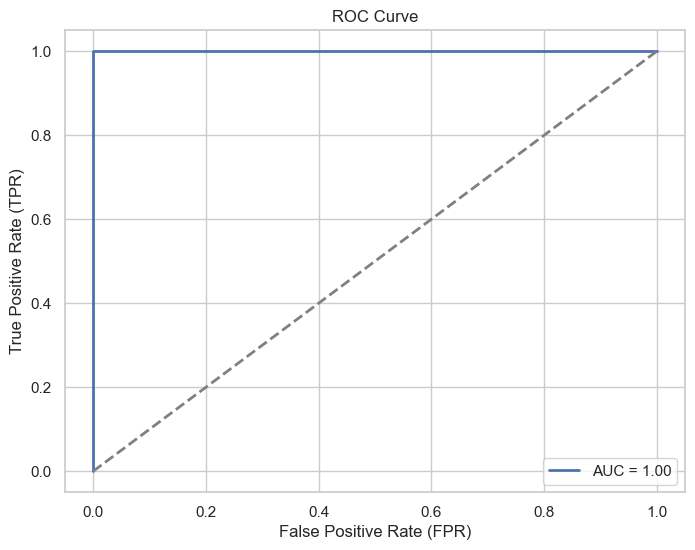

In [55]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {ada_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 7. Gradient Boosting Classifier
* This is an ensemble technique that uses the Gradient Descent algorithm in changing the weights.

In [56]:
#Gradient Boosting
grad = GradientBoostingClassifier(learning_rate=0.01)
grad.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [57]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = grad.predict(x_train)
y_pred_test = grad.predict(x_test)

grad_train_acc = accuracy_score(y_train, y_pred_train)
grad_test_acc = accuracy_score(y_test, y_pred_test)

grad_train_f1 = f1_score(y_train, y_pred_train)
grad_test_f1 = f1_score(y_test, y_pred_test)

grad_train_prec = precision_score(y_train, y_pred_train)
grad_test_prec = precision_score(y_test, y_pred_test)

grad_train_roc = roc_auc_score(y_train, y_pred_train)
grad_test_roc = roc_auc_score(y_test, y_pred_test)

grad_train_cm = confusion_matrix(y_train, y_pred_train)
grad_test_cm = confusion_matrix(y_test, y_pred_test)

In [58]:
#Printing all the meeasuring metric results
print('Gradient Boost training accuracy is', grad_train_acc)
print('Gradient Boost testing accuracy is', grad_test_acc)
print(" ")
print('Gradient Boost training F1 Score is', grad_train_f1)
print('Gradient Boost testing F1 Score is', grad_test_f1)
print(" ")
print('Gradient Boost training Precision is', grad_train_prec)
print('Gradient Boost testing Precision is', grad_test_prec)
print(" ")
print('Gradient Boost training ROC-AUC Score is', grad_train_roc)
print('Gradient Boost testing ROC-AUC Score is', grad_test_roc)
print(" ")
print('Gradient Boost training Confusion Matrix is')
print(grad_train_cm)
print(" ")
print('Gradient Boost testing Confusion Matrix is')
print(grad_test_cm)

Gradient Boost training accuracy is 1.0
Gradient Boost testing accuracy is 1.0
 
Gradient Boost training F1 Score is 1.0
Gradient Boost testing F1 Score is 1.0
 
Gradient Boost training Precision is 1.0
Gradient Boost testing Precision is 1.0
 
Gradient Boost training ROC-AUC Score is 1.0
Gradient Boost testing ROC-AUC Score is 1.0
 
Gradient Boost training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
Gradient Boost testing Confusion Matrix is
[[31  0]
 [ 0 44]]


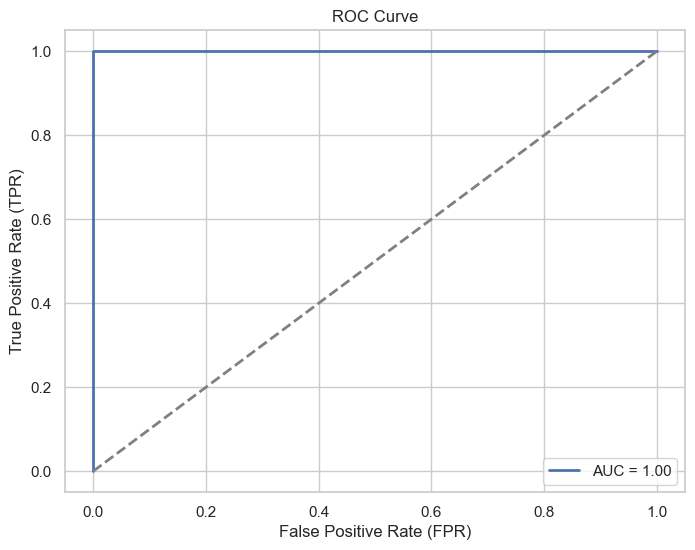

In [59]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {grad_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 8. SVM
* This model uses the support vector concept. There are 3 kernels which are linear, polynomial, and rbf.

### Linear Kernel

In [60]:
svcl = SVC(kernel= "linear")
svcl.fit(x_train , y_train)

SVC(kernel='linear')

In [61]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = svcl.predict(x_train)
y_pred_test = svcl.predict(x_test)

svcl_train_acc = accuracy_score(y_train, y_pred_train)
svcl_test_acc = accuracy_score(y_test, y_pred_test)

svcl_train_f1 = f1_score(y_train, y_pred_train)
svcl_test_f1 = f1_score(y_test, y_pred_test)

svcl_train_prec = precision_score(y_train, y_pred_train)
svcl_test_prec = precision_score(y_test, y_pred_test)

svcl_train_roc = roc_auc_score(y_train, y_pred_train)
svcl_test_roc = roc_auc_score(y_test, y_pred_test)

svcl_train_cm = confusion_matrix(y_train, y_pred_train)
svcl_test_cm = confusion_matrix(y_test, y_pred_test)

In [62]:
#Printing all the meeasuring metric results
print('SVC Linear Kernel training accuracy is', svcl_train_acc)
print('SVC Linear Kernel testing accuracy is', svcl_test_acc)
print(" ")
print('SVC Linear Kernel training F1 Score is', svcl_train_f1)
print('SVC Linear Kernel testing F1 Score is', svcl_test_f1)
print(" ")
print('SVC Linear Kernel training Precision is', svcl_train_prec)
print('SVC Linear Kernel testing Precision is', svcl_test_prec)
print(" ")
print('SVC Linear Kernel training ROC-AUC Score is', svcl_train_roc)
print('SVC Linear Kernel testing ROC-AUC Score is', svcl_test_roc)
print(" ")
print('SVC Linear Kernel training Confusion Matrix is')
print(svcl_train_cm)
print(" ")
print('SVC Linear Kernel testing Confusion Matrix is')
print(svcl_test_cm)

SVC Linear Kernel training accuracy is 0.9942857142857143
SVC Linear Kernel testing accuracy is 1.0
 
SVC Linear Kernel training F1 Score is 0.9949748743718593
SVC Linear Kernel testing F1 Score is 1.0
 
SVC Linear Kernel training Precision is 0.99
SVC Linear Kernel testing Precision is 1.0
 
SVC Linear Kernel training ROC-AUC Score is 0.9934210526315789
SVC Linear Kernel testing ROC-AUC Score is 1.0
 
SVC Linear Kernel training Confusion Matrix is
[[75  1]
 [ 0 99]]
 
SVC Linear Kernel testing Confusion Matrix is
[[31  0]
 [ 0 44]]


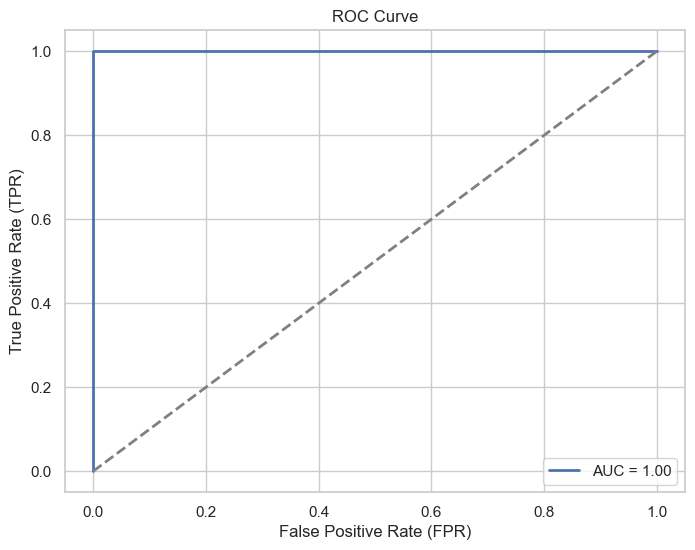

In [63]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {svcl_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Polynomial Kernel

In [64]:
svcp = SVC(kernel= "poly")
svcp.fit(x_train , y_train)

SVC(kernel='poly')

In [65]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = svcp.predict(x_train)
y_pred_test = svcp.predict(x_test)

svcp_train_acc = accuracy_score(y_train, y_pred_train)
svcp_test_acc = accuracy_score(y_test, y_pred_test)

svcp_train_f1 = f1_score(y_train, y_pred_train)
svcp_test_f1 = f1_score(y_test, y_pred_test)

svcp_train_prec = precision_score(y_train, y_pred_train)
svcp_test_prec = precision_score(y_test, y_pred_test)

svcp_train_roc = roc_auc_score(y_train, y_pred_train)
svcp_test_roc = roc_auc_score(y_test, y_pred_test)

svcp_train_cm = confusion_matrix(y_train, y_pred_train)
svcp_test_cm = confusion_matrix(y_test, y_pred_test)

In [66]:
#Printing all the meeasuring metric results
print('SVC Polynomial Kernel training accuracy is', svcp_train_acc)
print('SVC Polynomial Kernel testing accuracy is', svcp_test_acc)
print(" ")
print('SVC Polynomial Kernel training F1 Score is', svcp_train_f1)
print('SVC Polynomial Kernel testing F1 Score is', svcp_test_f1)
print(" ")
print('SVC Polynomial Kernel training Precision is', svcp_train_prec)
print('SVC Polynomial Kernel testing Precision is', svcp_test_prec)
print(" ")
print('SVC Polynomial Kernel training ROC-AUC Score is', svcp_train_roc)
print('SVC Polynomial Kernel testing ROC-AUC Score is', svcp_test_roc)
print(" ")
print('SVC Polynomial Kernel training Confusion Matrix is')
print(svcp_train_cm)
print(" ")
print('SVC Polynomial Kernel testing Confusion Matrix is')
print(svcp_test_cm)

SVC Polynomial Kernel training accuracy is 1.0
SVC Polynomial Kernel testing accuracy is 1.0
 
SVC Polynomial Kernel training F1 Score is 1.0
SVC Polynomial Kernel testing F1 Score is 1.0
 
SVC Polynomial Kernel training Precision is 1.0
SVC Polynomial Kernel testing Precision is 1.0
 
SVC Polynomial Kernel training ROC-AUC Score is 1.0
SVC Polynomial Kernel testing ROC-AUC Score is 1.0
 
SVC Polynomial Kernel training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
SVC Polynomial Kernel testing Confusion Matrix is
[[31  0]
 [ 0 44]]


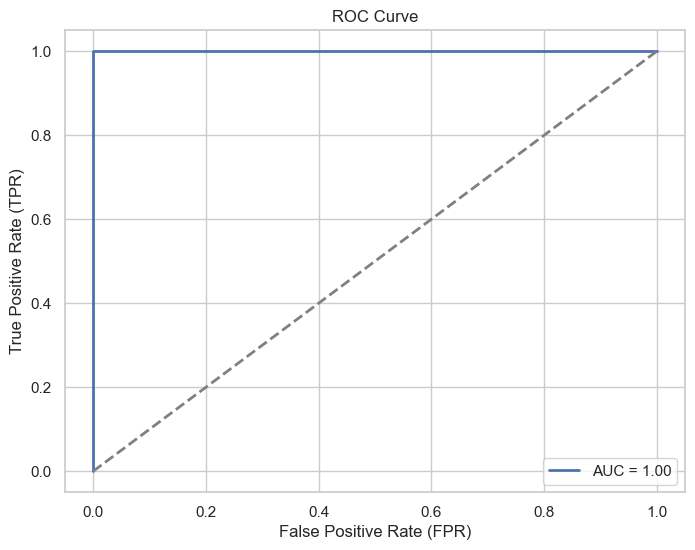

In [67]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {svcp_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### RBF Kernel (Radical Basis Function)

In [68]:
svcr = SVC(C= 20, gamma = 50)
svcr.fit(x_train , y_train)

SVC(C=20, gamma=50)

In [69]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = svcr.predict(x_train)
y_pred_test = svcr.predict(x_test)

svcr_train_acc = accuracy_score(y_train, y_pred_train)
svcr_test_acc = accuracy_score(y_test, y_pred_test)

svcr_train_f1 = f1_score(y_train, y_pred_train)
svcr_test_f1 = f1_score(y_test, y_pred_test)

svcr_train_prec = precision_score(y_train, y_pred_train)
svcr_test_prec = precision_score(y_test, y_pred_test)

svcr_train_roc = roc_auc_score(y_train, y_pred_train)
svcr_test_roc = roc_auc_score(y_test, y_pred_test)

svcr_train_cm = confusion_matrix(y_train, y_pred_train)
svcr_test_cm = confusion_matrix(y_test, y_pred_test)

In [70]:
#Printing all the meeasuring metric results
print('SVC RBF Kernel training accuracy is', svcr_train_acc)
print('SVC RBF Kernel testing accuracy is', svcr_test_acc)
print(" ")
print('SVC RBF Kernel training F1 Score is', svcr_train_f1)
print('SVC RBF Kernel testing F1 Score is', svcr_test_f1)
print(" ")
print('SVC RBF Kernel training Precision is', svcr_train_prec)
print('SVC RBF Kernel testing Precision is', svcr_test_prec)
print(" ")
print('SVC RBF Kernel training ROC-AUC Score is', svcr_train_roc)
print('SVC RBF Kernel testing ROC-AUC Score is', svcr_test_roc)
print(" ")
print('SVC RBF Kernel training Confusion Matrix is')
print(svcr_train_cm)
print(" ")
print('SVC RBF Kernel testing Confusion Matrix is')
print(svcr_test_cm)

SVC RBF Kernel training accuracy is 1.0
SVC RBF Kernel testing accuracy is 0.9866666666666667
 
SVC RBF Kernel training F1 Score is 1.0
SVC RBF Kernel testing F1 Score is 0.9887640449438202
 
SVC RBF Kernel training Precision is 1.0
SVC RBF Kernel testing Precision is 0.9777777777777777
 
SVC RBF Kernel training ROC-AUC Score is 1.0
SVC RBF Kernel testing ROC-AUC Score is 0.9838709677419355
 
SVC RBF Kernel training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
SVC RBF Kernel testing Confusion Matrix is
[[30  1]
 [ 0 44]]


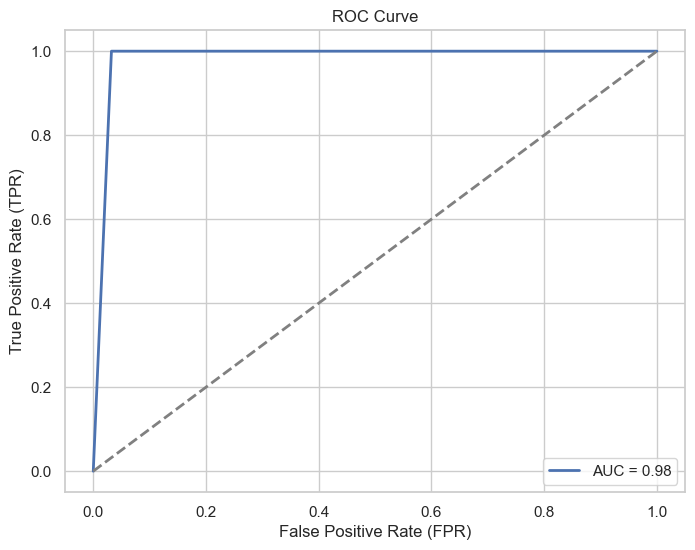

In [71]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {svcr_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 9. Stacking

* In this technique different types of estimators or even ensembles can be used stacked upon each other to get the results.
* Here the logistic regressor, decision tree classifier, and the gradient boosting classifier are stacked together.

In [72]:
estimators = [('log', LogisticRegression(max_iter=500)), ('rnd', RandomForestClassifier(max_depth=5)), ('svcr', SVC(C= 20, gamma = 50))]
stack = StackingClassifier(estimators=estimators)
stack.fit(x_train, y_train)

StackingClassifier(estimators=[('log', LogisticRegression(max_iter=500)),
                               ('rnd', RandomForestClassifier(max_depth=5)),
                               ('svcr', SVC(C=20, gamma=50))])

In [73]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = stack.predict(x_train)
y_pred_test = stack.predict(x_test)

stack_train_acc = accuracy_score(y_train, y_pred_train)
stack_test_acc = accuracy_score(y_test, y_pred_test)

stack_train_f1 = f1_score(y_train, y_pred_train)
stack_test_f1 = f1_score(y_test, y_pred_test)

stack_train_prec = precision_score(y_train, y_pred_train)
stack_test_prec = precision_score(y_test, y_pred_test)

stack_train_roc = roc_auc_score(y_train, y_pred_train)
stack_test_roc = roc_auc_score(y_test, y_pred_test)

stack_train_cm = confusion_matrix(y_train, y_pred_train)
stack_test_cm = confusion_matrix(y_test, y_pred_test)

In [74]:
#Printing all the meeasuring metric results
print('Stacking training accuracy is', stack_train_acc)
print('Stacking testing accuracy is', stack_test_acc)
print()
print('Stacking training F1 Score is', stack_train_f1)
print('Stacking testing F1 Score is', stack_test_f1)
print()
print('Stacking training Precision is', stack_train_prec)
print('Stacking testing Precision is', stack_test_prec)
print()
print('Stacking training ROC-AUC Score is', stack_train_roc)
print('Stacking testing ROC-AUC Score is', stack_test_roc)
print()
print('Stacking training Confusion Matrix is')
print(stack_train_cm)
print()
print('Stacking testing Confusion Matrix is')
print(stack_test_cm)

Stacking training accuracy is 1.0
Stacking testing accuracy is 1.0

Stacking training F1 Score is 1.0
Stacking testing F1 Score is 1.0

Stacking training Precision is 1.0
Stacking testing Precision is 1.0

Stacking training ROC-AUC Score is 1.0
Stacking testing ROC-AUC Score is 1.0

Stacking training Confusion Matrix is
[[76  0]
 [ 0 99]]

Stacking testing Confusion Matrix is
[[31  0]
 [ 0 44]]


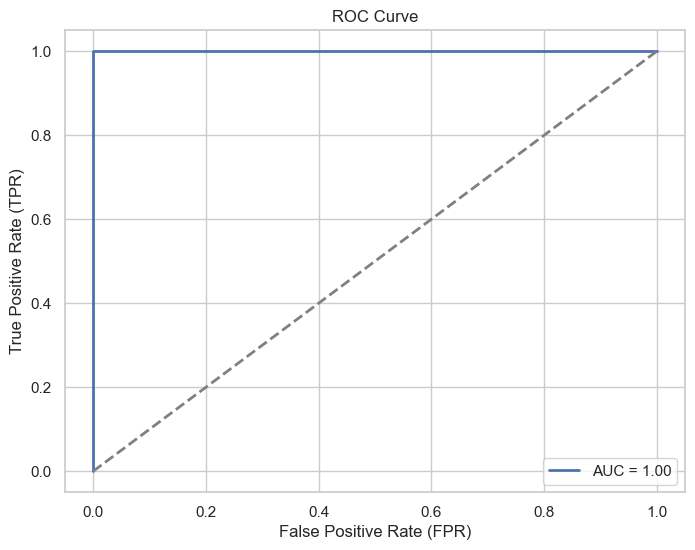

In [75]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {stack_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Club all the results 

In [76]:
results = {
    'Model Name': ['Logistic Regression','Decision Tree', 'KNN', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boost', 'SVC Linear Kernel', 'SVC Polynomial Kernel', 'SVC RBF Kernel', 'Stacking'],
    'Training Accuracy': [log_train_acc, dec_train_acc, knn_train_acc, rnd_train_acc, bag_train_acc, ada_train_acc, grad_train_acc, svcl_train_acc, svcp_train_acc, svcr_train_acc, stack_train_acc],
    'Testing Accuracy': [log_test_acc, dec_test_acc, knn_test_acc, rnd_test_acc, bag_test_acc, ada_test_acc, grad_test_acc, svcl_test_acc, svcp_test_acc, svcr_test_acc, stack_test_acc],
    'Training F1 Score': [log_train_f1, dec_train_f1, knn_train_f1, rnd_train_f1, bag_train_f1, ada_train_f1, grad_train_f1, svcl_train_f1, svcp_train_f1, svcr_train_f1, stack_train_f1],
    'Testing F1 Score': [log_test_f1, dec_test_f1, knn_test_f1, rnd_test_f1, bag_test_f1, ada_test_f1, grad_test_f1, svcl_test_f1, svcp_test_f1, svcr_test_f1, stack_test_f1],
    'Training Precision': [log_train_prec, dec_train_prec, knn_train_prec, rnd_train_prec, bag_train_prec, ada_train_prec, grad_train_prec, svcl_train_prec, svcp_train_prec, svcr_train_prec, stack_train_prec],
    'Testing Precision': [log_test_prec, dec_test_prec, knn_test_prec, rnd_test_prec, bag_test_prec, ada_test_prec, grad_test_prec, svcl_test_prec, svcp_test_prec, svcr_test_prec, stack_test_prec],
    'Training ROC-AUC Score': [log_train_roc, dec_train_roc, knn_train_roc, rnd_train_roc, bag_train_roc, ada_train_roc, grad_train_roc, svcl_train_roc, svcp_train_roc, svcr_train_roc, stack_train_roc],
    'Testing ROC-AUC Score': [log_test_roc, dec_test_roc, knn_test_roc, rnd_test_roc, bag_test_roc, ada_test_roc, grad_test_roc, svcl_test_roc, svcp_test_roc, svcr_test_roc, stack_test_roc]
}

results_df = pd.DataFrame(results)
results_df

,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score,Training Precision,Testing Precision,Training ROC-AUC Score,Testing ROC-AUC Score
0,Logistic Regression,0.994286,1.000000,0.994975,1.000000,0.99,1.000000,0.993421,1.000000
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
2,KNN,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
4,Bagging,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
5,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
6,Gradient Boost,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
7,SVC Linear Kernel,0.994286,1.000000,0.994975,1.000000,0.99,1.000000,0.993421,1.000000
8,SVC Polynomial Kernel,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
9,SVC RBF Kernel,1.000000,0.986667,1.000000,0.988764,1.00,0.977778,1.000000,0.983871


In [77]:
results_df.sort_values(by=['Training F1 Score', 'Testing F1 Score'], ascending=False)

,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score,Training Precision,Testing Precision,Training ROC-AUC Score,Testing ROC-AUC Score
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
2,KNN,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
4,Bagging,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
5,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
6,Gradient Boost,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
8,SVC Polynomial Kernel,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
10,Stacking,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
9,SVC RBF Kernel,1.000000,0.986667,1.000000,0.988764,1.00,0.977778,1.000000,0.983871
0,Logistic Regression,0.994286,1.000000,0.994975,1.000000,0.99,1.000000,0.993421,1.000000


-------------
 From the results table it is clear that the **Decision Tree, KNN, Random Forest, Bagging, AdaBoost, Gradient Boost, SVC Polynomial Kernel, Stacking and the Neural Network classifiers** has the highest F1 Score of 100%.

# Saving the model and deployment

In [78]:
import pickle

In [81]:
# Save the model to a file
with open('rnd.pkl', 'wb') as file:
    pickle.dump(rnd, file)

# Load the model
load = open('rnd.pkl', 'rb')
model = pickle.load(load)

# Prediction function
def predict(Industrial_Risk, Management_Risk, Financial_Flexibility, Credibility, Competitiveness, Operating_Risk):
    prediction = rnd.predict([[Industrial_Risk, Management_Risk, Financial_Flexibility, Credibility, Competitiveness, Operating_Risk]])
    return prediction[0]  # Use prediction[0] to get the actual prediction value
